In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

from sklearn.compose import ColumnTransformer

In [3]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day32-binning-and-binarization/train.csv')[['Age','Fare', 'Survived']]  

In [5]:
df.head()

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [6]:
 df.dropna(inplace = True)

In [7]:
df.shape

(714, 3)

In [8]:
df.head()

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [9]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [10]:
X.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [12]:
X_train.head()

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542
253,30.0,16.1000
719,33.0,7.7750
666,25.0,13.0000


In [13]:
clf = DecisionTreeClassifier()

In [14]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [15]:
y_pred = clf.predict(X_test)

In [16]:
print('Accuracy_score of DT', accuracy_score(y_test, y_pred))

Accuracy_score of DT 0.6223776223776224


In [17]:
np.mean(cross_val_score(clf, X, y, scoring = 'accuracy', cv = 10))

0.6373043818466353

In [18]:
kbin_age = KBinsDiscretizer(n_bins = 5, encode = 'ordinal', strategy = 'kmeans')
kbin_fare = KBinsDiscretizer(n_bins = 5, encode = 'ordinal', strategy = 'kmeans')

In [19]:
trf = ColumnTransformer([('first',kbin_age, [0]),
                        ('second', kbin_fare, [1])])

In [20]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [21]:
trf.named_transformers_['first'].n_bins_

array([5])

In [22]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42      , 12.69636862, 27.02765256, 39.35418895, 54.21464646,
              80.        ])                                                   ],
      dtype=object)

In [23]:
output = pd.DataFrame({
    'age': X_train['Age'],
    'age_trf': X_train_trf[:,0],
    'fare': X_train['Fare'],
    'fare_trf': X_train_trf[:, 1]
})

In [24]:
output['age_labels'] = pd.cut(x=X_train['Age'], bins = trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'], bins = trf.named_transformers_['second'].bin_edges_[0].tolist())

In [25]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
12,20.0,1.0,8.0500,0.0,"(12.696, 27.028]","(0.0, 42.424]"
686,14.0,1.0,39.6875,0.0,"(12.696, 27.028]","(0.0, 42.424]"
805,31.0,2.0,7.7750,0.0,"(27.028, 39.354]","(0.0, 42.424]"
735,28.5,2.0,16.1000,0.0,"(27.028, 39.354]","(0.0, 42.424]"
621,42.0,3.0,52.5542,1.0,"(39.354, 54.215]","(42.424, 100.624]"


In [26]:
clf.fit(X_train_trf, y_train)

DecisionTreeClassifier()

In [27]:
ypred2 = clf.predict(X_test_trf)

In [28]:
accuracy_score(y_test, ypred2)

0.6223776223776224

In [29]:
def discretize(bins, strategy):
    kbin = KBinsDiscretizer(n_bins = bins, encode = 'ordinal', strategy = strategy)
    
    trf = ColumnTransformer([('first', kbin, [0, 1])])
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(clf, X_trf, y, cv = 10, scoring = "accuracy")))
    X_trf = pd.DataFrame(X_trf, columns = X.columns)
    for col in X.columns:
        
        plt.figure(figsize=(14, 4))
        plt.subplot(121)
        plt.hist(X[col])
        plt.title(f'Before transformation {col}')
       
        plt.subplot(122)
        plt.hist(X_trf[col], color = 'red')
        plt.title(f'After transformation {col}')
        
        plt.show()

## Uniform Transformation

0.6864632237871675


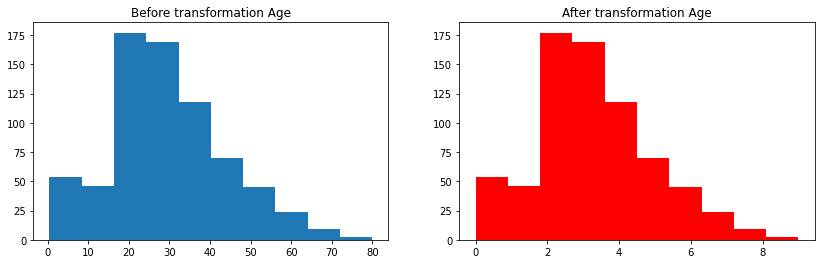

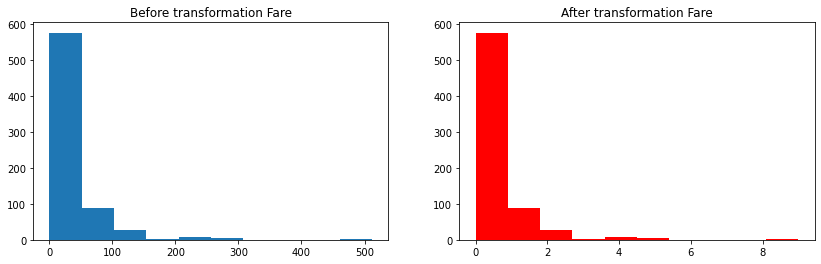

In [30]:
discretize(10, 'uniform')

# Quantile Transformation

0.682140062597809


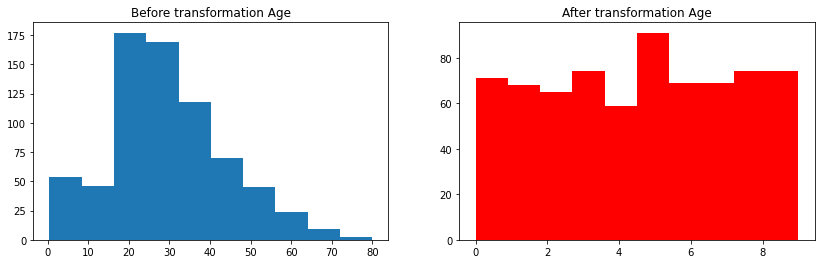

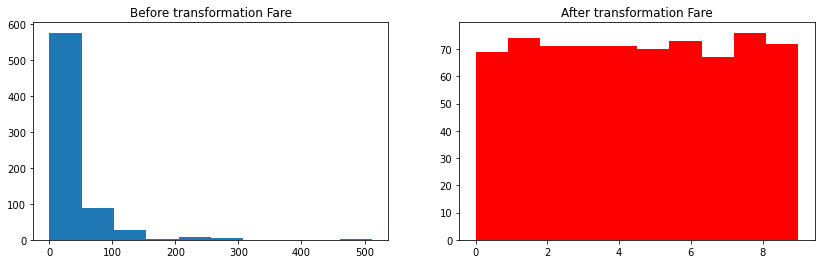

In [31]:
discretize(10, 'quantile')

# Kmeans Transformation

0.6655320813771518


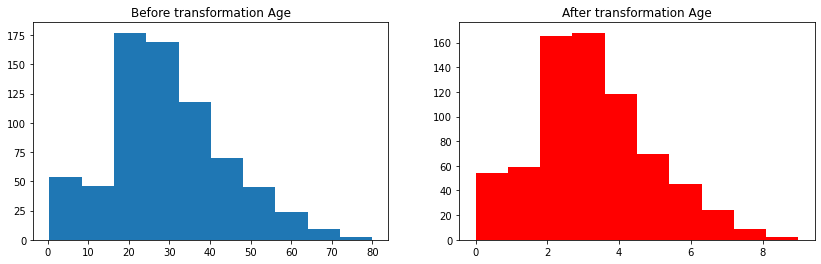

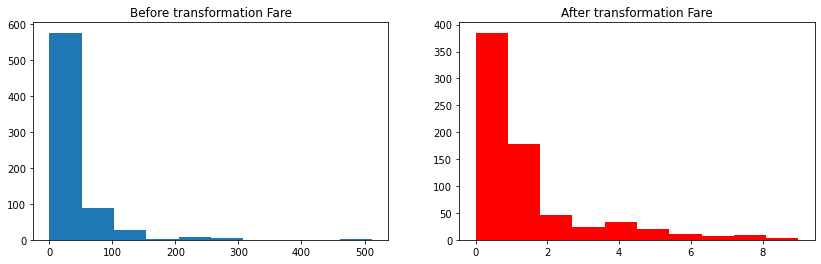

In [32]:
discretize(10, 'kmeans')

# Custom Bining

In [34]:
# no scilit learn library for this we need to write pandas code for it

# Binarization 

converting continuous variables to binary variables

e.g - Image Processing